In [3]:
import numpy as np
import pandas as pd
from tensorflow import keras

# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

breast_cancer = pd.read_csv('./breast-cancer-wisconsin.csv')

breast_cancer.dropna()
breast_cancer['Class'].replace([2,4],[0,1],inplace=True)

X = preprocessing.scale(breast_cancer.drop(['Sample code number', 'Class'], axis=1).to_numpy())
y = breast_cancer['Class'].to_numpy()

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=0)

In [146]:
train_data.shape

(478, 9)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import TensorBoard
import datetime

# Building Keras Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax'),
])

# Compile Keras Model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

log_dir = "logs/fit/Breast_Cancer_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [172]:
model.fit(
  train_data, # training data
  train_labels, # training targets
  epochs=15,
  batch_size=32,
  validation_data=(test_data, test_labels),
  callbacks=[tensorboard_callback]
)

model.save_weights('./models/Breast_Cancer_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '_model.h5')

Train on 478 samples, validate on 205 samples
Epoch 1/15
478/478 [==============================] - 0s 832us/sample - loss: 0.4457 - accuracy: 0.8849 - val_loss: 0.2281 - val_accuracy: 0.9610
Epoch 2/15
478/478 [==============================] - 0s 109us/sample - loss: 0.1427 - accuracy: 0.9749 - val_loss: 0.1039 - val_accuracy: 0.9659
Epoch 3/15
478/478 [==============================] - 0s 116us/sample - loss: 0.0785 - accuracy: 0.9749 - val_loss: 0.0924 - val_accuracy: 0.9659
Epoch 4/15
478/478 [==============================] - 0s 126us/sample - loss: 0.0743 - accuracy: 0.9749 - val_loss: 0.0917 - val_accuracy: 0.9610
Epoch 5/15
478/478 [==============================] - 0s 117us/sample - loss: 0.0707 - accuracy: 0.9728 - val_loss: 0.0887 - val_accuracy: 0.9659
Epoch 6/15
478/478 [==============================] - 0s 116us/sample - loss: 0.0673 - accuracy: 0.9770 - val_loss: 0.0851 - val_accuracy: 0.9659
Epoch 7/15
478/478 [==============================] - 0s 120us/sample - loss: 

In [5]:
from collections import Counter
model.load_weights('./models/Breast_Cancer_20200405-153046_model.h5')

predictions = model.predict(X)

pred_array = np.argmax(predictions, axis=1)
actual_array = y
print(pred_array.size)
# # Print our model's predictions.
print(pred_array) # [7, 2, 1, 0, 4]

# # Check our predictions against the ground truths.
print(actual_array) # [7, 2, 1, 0, 4]

comparisons = Counter([a == actual_array[index] for index, a in enumerate(pred_array)])
comparisons

683
[0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 

Counter({True: 669, False: 14})

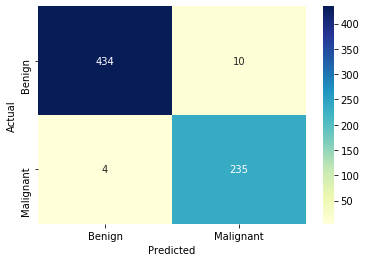

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(actual_array, pred_array)

df_cm = pd.DataFrame(array, index = [i for i in np.array(['Benign', 'Malignant'])],
                  columns = [i for i in np.array(['Benign', 'Malignant'])])

fig = sn.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()